# Data

In [1]:
using Distributions
using FillArrays
using StatsPlots

using LinearAlgebra
using Random

using Turing

# Set a random seed.
Random.seed!(3)

# Define Gaussian mixture model.
w = [0.5, 0.5] # weights for clusters (can be viewed as priors)
μ = [-3.5, 0.5] # means for clusters
mixturemodel = MixtureModel([MvNormal(Fill(μₖ, 2), I) for μₖ in μ], w)

# We draw the data points.
N = 60 # number of data points in each cluster
x = TArray(rand(mixturemodel, N)); # 2x60 Matrix{Float64} (dimension x datapoints)

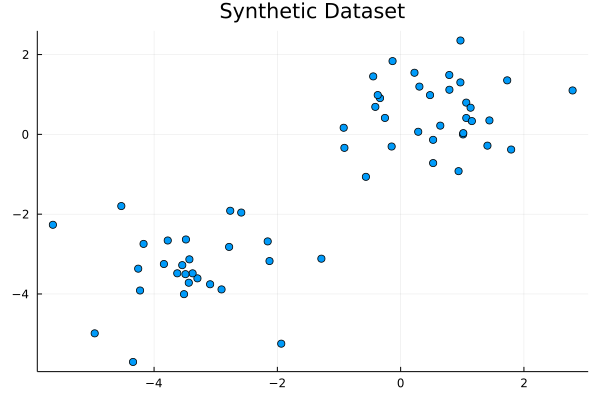

In [2]:
scatter(x[1, :], x[2, :]; legend=false, title="Synthetic Dataset")

In [48]:
x = vcat(zeros(80), ones(20));
y = 

In [72]:
using LogExpFunctions: logistic

@model function lvm(x, y, param, latent=missing)
    n = length(x)
    latent ~ filldist(Normal(0, 1), n) # z_i ~ N(0, 1); latent is a vector
    w, b = param                       # w and b are scalars
    p = logistic.(w * latent .+ b)      # p is a vector; 0 < p_i < 1
    x ~ arraydist(Bernoulli.(p))
  end
  
  init_param() = randn(2)

init_param (generic function with 1 method)

In [75]:
using Optim

function get_latents(chain; keep_pct=.5, use_every=10)
    n_keep = floor(Int, keep_pct * length(chain))
    latent = chain.value.data[end - n_keep + 1 : end, 1:100]
    return latent
end

param = init_param()
@show param
model = lvm(x, param)
n_samples = 1000
sampler = HMC(0.5, 10)

n_iterations = 10

for i in 1:n_iterations
# E-step
chain = sample(model, sampler, n_samples; progress=false)

# M-step
obj(param) = -logjoint(lvm(x, param), (latent = get_latent(chain), ))

# M-step
obj(param) = -mean([logjoint(lvm(x, param), (latent = latent,)) for latent in eachrow(get_latents(chain))])
optim = optimize(obj, param)

param = [1.117426155920159, -0.9497588754370202]


 * Status: success

 * Candidate solution
    Final objective value:     1.830911e+02

 * Found with
    Algorithm:     Nelder-Mead

 * Convergence measures
    √(Σ(yᵢ-ȳ)²)/n ≤ 1.0e-08

 * Work counters
    Seconds run:   0  (vs limit Inf)
    Iterations:    30
    f(x) calls:    60


In [78]:
optim.minimum

183.09105990116663

In [70]:
methods(sample)

# 45 methods for generic function "sample":
[1] sample(model::AdvancedHMC.DifferentiableDensityModel, kernel::AdvancedHMC.AbstractMCMCKernel, metric::AdvancedHMC.AbstractMetric, adaptor::AdvancedHMC.Adaptation.AbstractAdaptor, parallel::AbstractMCMC.AbstractMCMCEnsemble, N::Integer, nchains::Integer; kwargs...) in AdvancedHMC at /home/matthewbaggins/.julia/packages/AdvancedHMC/51xgc/src/abstractmcmc.jl:131
[2] sample(model::AdvancedHMC.DifferentiableDensityModel, kernel::AdvancedHMC.AbstractMCMCKernel, metric::AdvancedHMC.AbstractMetric, adaptor::AdvancedHMC.Adaptation.AbstractAdaptor, N::Integer; kwargs...) in AdvancedHMC at /home/matthewbaggins/.julia/packages/AdvancedHMC/51xgc/src/abstractmcmc.jl:93
[3] sample(h::AdvancedHMC.Hamiltonian, κ::AdvancedHMC.AbstractMCMCKernel, θ::AbstractVecOrMat{<:AbstractFloat}, n_samples::Int64) in AdvancedHMC at /home/matthewbaggins/.julia/packages/AdvancedHMC/51xgc/src/sampler.jl:118
[4] sample(h::AdvancedHMC.Hamiltonian, κ::AdvancedHMC.AbstractMCMCKernel, θ::AbstractVecOrMat{<:AbstractFloat}, n_samples::Int64, adaptor::AdvancedHMC.Adaptation.AbstractAdaptor) in AdvancedHMC at /home/matthewbaggins/.julia/packages/AdvancedHMC/51xgc/src/sampler.jl:118
[5] sample(h::AdvancedHMC.Hamiltonian, κ::AdvancedHMC.AbstractMCMCKernel, θ::AbstractVecOrMat{<:AbstractFloat}, n_samples::Int64, adaptor::AdvancedHMC.Adaptation.AbstractAdaptor, n_adapts::Int64; drop_warmup, verbose, progress, pm_next!) in AdvancedHMC at /home/matthewbaggins/.julia/packages/AdvancedHMC/51xgc/src/sampler.jl:118
[6] sample(chn::Chains, wv::AbstractWeights, n::Integer; replace, ordered) in MCMCChains at /home/matthewbaggins/.julia/packages/MCMCChains/EvzG5/src/sampling.jl:22
[7] sample(chn::Chains, n::Integer; replace, ordered) in MCMCChains at /home/matthewbaggins/.julia/packages/MCMCChains/EvzG5/src/sampling.jl:19
[8] sample(model::AbstractMCMC.AbstractModel, sampler::AdvancedPS.SMC; kwargs...) in AdvancedPS at /home/matthewbaggins/.julia/packages/AdvancedPS/9Qw7K/src/smc.jl:29
[9] sample(model::AbstractMCMC.AbstractModel, sampler::AbstractMCMC.AbstractSampler, parallel::AbstractMCMC.AbstractMCMCEnsemble, N::Integer, nchains::Integer; kwargs...) in AbstractMCMC at /home/matthewbaggins/.julia/packages/AbstractMCMC/fnRmh/src/sample.jl:57
[10] sample(model::AbstractMCMC.AbstractModel, sampler::AbstractMCMC.AbstractSampler, arg; kwargs...) in AbstractMCMC at /home/matthewbaggins/.julia/packages/AbstractMCMC/fnRmh/src/sample.jl:15
[11] sample(model::AbstractMCMC.AbstractModel, alg::Turing.Inference.InferenceAlgorithm, ensemble::AbstractMCMC.AbstractMCMCEnsemble, N::Integer, n_chains::Integer; kwargs...) in Turing.Inference at /home/matthewbaggins/.julia/packages/Turing/Oczpc/src/inference/Inference.jl:184
[12] sample(model::AbstractMCMC.AbstractModel, alg::Turing.Inference.InferenceAlgorithm, N::Integer; kwargs...) in Turing.Inference at /home/matthewbaggins/.julia/packages/Turing/Oczpc/src/inference/Inference.jl:129
[13] sample(rng::AbstractRNG, model::AbstractMCMC.AbstractModel, sampler::AdvancedPS.SMC; kwargs...) in AdvancedPS at /home/matthewbaggins/.julia/packages/AdvancedPS/9Qw7K/src/smc.jl:33
[14] sample(rng::AbstractRNG, model::AbstractMCMC.AbstractModel, sampler::DynamicPPL.Sampler{<:SMC}, N::Integer; chain_type, resume_from, progress, kwargs...) in Turing.Inference at /home/matthewbaggins/.julia/packages/Turing/Oczpc/src/inference/AdvancedSMC.jl:80
[15] sample(rng::AbstractRNG, model::AbstractMCMC.AbstractModel, sampler::DynamicPPL.Sampler{<:Turing.Inference.AdaptiveHamiltonian}, N::Integer; chain_type, resume_from, progress, nadapts, discard_adapt, discard_initial, kwargs...) in Turing.Inference at /home/matthewbaggins/.julia/packages/Turing/Oczpc/src/inference/hmc.jl:103
[16] sample(rng::AbstractRNG, model::AbstractMCMC.AbstractModel, alg::Prior, ensemble::AbstractMCMC.AbstractMCMCEnsemble, N::Integer, n_chains::Integer; chain_type, progress, kwargs...) in Turing.Inference at /home/matthewbaggins/.julia/packages/Turing/Oc

In [41]:
using StatsPlots

In [53]:
# plot(chain[501:end])

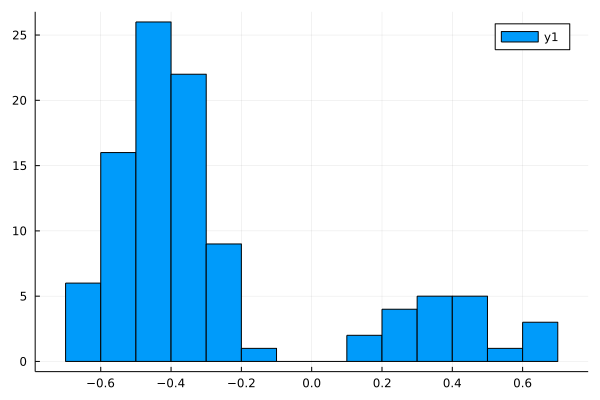

In [63]:
histogram(mean(chain[501:end]).nt.mean)

21-element Vector{Float64}:
 -0.4393746735614704
  0.26536106904888856
  0.26871514549047115
  0.4685564459981621
  0.5325496472410143
  0.48196316425857877
  0.44923496855401945
  0.47702464214082824
  0.3522369931087722
  0.15017339073706704
  ⋮
  0.39608598825400565
  0.23829243922731946
  0.47590479182666584
  0.3660084458671497
  0.6204060386343104
  0.16499402962841214
  0.3786097033326864
  0.3407529452385219
  0.6151723413762875

In [59]:
fieldnames(ChainDataFrame)

(:name, :nt, :nrows, :ncols)

## Loop

In [17]:
using Optim

function get_k(chain; keep_pct=.5, use_every=10)
    data = chain.value.data[:, 1:60]
    n_keep = floor(Int, keep_pct * size(data)[1])
    k = Matrix{Int}(data[end-n_keep+1 : use_every : end, :])
    return k
end

function makeobj(chain)
    obj(param) = -logjoint(em_gmm(x, param), (k = get_k(chain), ))
    return obj
end

# Alg (hyper)parameters

n_iterations = 5
n_samples = 100
n_particles = 1000

# Sampler
## 1. Simple PG
sampler = PG(n_particles, :k)
## 2. Not so simple PG
# sampler = Gibbs(PG(n_samples, :k))
## 3. Simple HMC
# sampler = HMC(.1, 5, :k)
## 4. Not so simple HMC
# sampler = Gibbs(PG(n_samples, :k), HMC(0.1, 5))
## 5. NUTS
# sampler = NUTS(0.65)
## 6. SMC
# sampler = SMC()

# Process history
# chain_history = []
# optim_history = []
# k_history = []

for i in 1:n_iterations
    # Prepare parameters
    param = isempty(optim_history) ? init_param(x) : optim_history[end].minimizer
    # Prepare latent
    k = isempty(k_history) ? missing : k_history[end]

    # E-step
    chain = deepcopy(sample(em_gmm(x, param), sampler, n_samples))
    
    # M-step
    obj = makeobj(chain)
    optim = optimize(obj, param)
    
    # History
    push!(chain_history, deepcopy(chain))
    push!(optim_history, deepcopy(optim))
    push!(k_history, deepcopy(get_k(chain)))
end

Sampling   0%|                                          |  ETA: N/A


Sampling   1%|▍                                         |  ETA: 0:07:12


Sampling   2%|▉                                         |  ETA: 0:07:24


Sampling   3%|█▎                                        |  ETA: 0:07:25


Sampling   4%|█▋                                        |  ETA: 0:07:27


Sampling   5%|██▏                                       |  ETA: 0:07:22


Sampling   6%|██▌                                       |  ETA: 0:07:19


Sampling   7%|███                                       |  ETA: 0:07:16


Sampling   8%|███▍                                      |  ETA: 0:07:10


Sampling   9%|███▊                                      |  ETA: 0:07:04


Sampling  10%|████▎                                     |  ETA: 0:07:00


Sampling  11%|████▋                                     |  ETA: 0:06:56


Sampling  12%|█████                                     |  ETA: 0:06:51


Sampling  13%|█████▌                                    |  ETA: 0:06:46


Sampling  14%|█████▉                                    |  ETA: 0:06:41


Sampling  15%|██████▎                                   |  ETA: 0:06:37


Sampling  16%|██████▊                                   |  ETA: 0:06:34


Sampling  17%|███████▏                                  |  ETA: 0:06:33


Sampling  18%|███████▌                                  |  ETA: 0:06:30


Sampling  19%|████████                                  |  ETA: 0:06:27


Sampling  20%|████████▍                                 |  ETA: 0:06:24


Sampling  21%|████████▉                                 |  ETA: 0:06:21


Sampling  22%|█████████▎                                |  ETA: 0:06:17


Sampling  23%|█████████▋                                |  ETA: 0:06:14


Sampling  24%|██████████▏                               |  ETA: 0:06:10


Sampling  25%|██████████▌                               |  ETA: 0:06:06


Sampling  26%|██████████▉                               |  ETA: 0:06:03


Sampling  27%|███████████▍                              |  ETA: 0:05:59


Sampling  28%|███████████▊                              |  ETA: 0:05:55


Sampling  29%|████████████▏                             |  ETA: 0:05:51


Sampling  30%|████████████▋                             |  ETA: 0:05:46


Sampling  31%|█████████████                             |  ETA: 0:05:43


Sampling  32%|█████████████▌                            |  ETA: 0:05:38


Sampling  33%|█████████████▉                            |  ETA: 0:05:34


Sampling  34%|██████████████▎                           |  ETA: 0:05:30


Sampling  35%|██████████████▊                           |  ETA: 0:05:26


Sampling  36%|███████████████▏                          |  ETA: 0:05:21


Sampling  37%|███████████████▌                          |  ETA: 0:05:17


Sampling  38%|████████████████                          |  ETA: 0:05:12


Sampling  39%|████████████████▍                         |  ETA: 0:05:07


Sampling  40%|████████████████▊                         |  ETA: 0:05:02


Sampling  41%|█████████████████▎                        |  ETA: 0:04:57


Sampling  42%|█████████████████▋                        |  ETA: 0:04:53


Sampling  43%|██████████████████                        |  ETA: 0:04:48


Sampling  44%|██████████████████▌                       |  ETA: 0:04:43


Sampling  45%|██████████████████▉                       |  ETA: 0:04:38


Sampling  46%|███████████████████▍                      |  ETA: 0:04:34


Sampling  47%|███████████████████▊                      |  ETA: 0:04:29


Sampling  48%|████████████████████▏                     |  ETA: 0:04:24


Sampling  49%|████████████████████▋                     |  ETA: 0:04:19


Sampling  50%|█████████████████████                     |  ETA: 0:04:14


Sampling  51%|█████████████████████▍                    |  ETA: 0:04:09


Sampling  52%|█████████████████████▉                    |  ETA: 0:04:04


Sampling  53%|██████████████████████▎                   |  ETA: 0:03:59


Sampling  54%|██████████████████████▋                   |  ETA: 0:03:54


Sampling  55%|███████████████████████▏                  |  ETA: 0:03:50


Sampling  56%|███████████████████████▌                  |  ETA: 0:03:45


Sampling  57%|████████████████████████                  |  ETA: 0:03:40


Sampling  58%|████████████████████████▍                 |  ETA: 0:03:35


Sampling  59%|████████████████████████▊                 |  ETA: 0:03:29


Sampling  60%|█████████████████████████▎                |  ETA: 0:03:24


Sampling  61%|█████████████████████████▋                |  ETA: 0:03:19


Sampling  62%|██████████████████████████                |  ETA: 0:03:14


Sampling  63%|██████████████████████████▌               |  ETA: 0:03:09


Sampling  64%|██████████████████████████▉               |  ETA: 0:03:04


Sampling  65%|███████████████████████████▎              |  ETA: 0:02:59


Sampling  66%|███████████████████████████▊              |  ETA: 0:02:54


Sampling  67%|████████████████████████████▏             |  ETA: 0:02:49


Sampling  68%|████████████████████████████▌             |  ETA: 0:02:44


Sampling  69%|█████████████████████████████             |  ETA: 0:02:40


Sampling  70%|█████████████████████████████▍            |  ETA: 0:02:35


Sampling  71%|█████████████████████████████▉            |  ETA: 0:02:30


Sampling  72%|██████████████████████████████▎           |  ETA: 0:02:25


Sampling  73%|██████████████████████████████▋           |  ETA: 0:02:20


Sampling  74%|███████████████████████████████▏          |  ETA: 0:02:15


Sampling  75%|███████████████████████████████▌          |  ETA: 0:02:10


Sampling  76%|███████████████████████████████▉          |  ETA: 0:02:05


Sampling  77%|████████████████████████████████▍         |  ETA: 0:02:00


Sampling  78%|████████████████████████████████▊         |  ETA: 0:01:55


Sampling  79%|█████████████████████████████████▏        |  ETA: 0:01:50


Sampling  80%|█████████████████████████████████▋        |  ETA: 0:01:45


Sampling  81%|██████████████████████████████████        |  ETA: 0:01:40


Sampling  82%|██████████████████████████████████▌       |  ETA: 0:01:35


Sampling  83%|██████████████████████████████████▉       |  ETA: 0:01:30


Sampling  84%|███████████████████████████████████▎      |  ETA: 0:01:24


Sampling  85%|███████████████████████████████████▊      |  ETA: 0:01:20


Sampling  86%|████████████████████████████████████▏     |  ETA: 0:01:15


Sampling  87%|████████████████████████████████████▌     |  ETA: 0:01:10


Sampling  88%|█████████████████████████████████████     |  ETA: 0:01:04


Sampling  89%|█████████████████████████████████████▍    |  ETA: 0:00:59


Sampling  90%|█████████████████████████████████████▊    |  ETA: 0:00:54


Sampling  91%|██████████████████████████████████████▎   |  ETA: 0:00:49


Sampling  92%|██████████████████████████████████████▋   |  ETA: 0:00:43


Sampling  93%|███████████████████████████████████████   |  ETA: 0:00:38


Sampling  94%|███████████████████████████████████████▌  |  ETA: 0:00:32


Sampling  95%|███████████████████████████████████████▉  |  ETA: 0:00:27


Sampling  96%|████████████████████████████████████████▍ |  ETA: 0:00:22


Sampling  97%|████████████████████████████████████████▊ |  ETA: 0:00:16


Sampling  98%|█████████████████████████████████████████▏|  ETA: 0:00:11


Sampling  99%|█████████████████████████████████████████▋|  ETA: 0:00:05


Sampling 100%|██████████████████████████████████████████| Time: 0:09:05
Sampling 100%|██████████████████████████████████████████| Time: 0:09:05
Sampling   0%|                                          |  ETA: N/A


Sampling   1%|▍                                         |  ETA: 0:10:22


Sampling   2%|▉                                         |  ETA: 0:09:49


Sampling   3%|█▎                                        |  ETA: 0:09:36


Sampling   4%|█▋                                        |  ETA: 0:09:23


Sampling   5%|██▏                                       |  ETA: 0:09:32


Sampling   6%|██▌                                       |  ETA: 0:09:23


Sampling   7%|███                                       |  ETA: 0:09:05


Sampling   8%|███▍                                      |  ETA: 0:08:53


Sampling   9%|███▊                                      |  ETA: 0:08:44


Sampling  10%|████▎                                     |  ETA: 0:08:46


Sampling  11%|████▋                                     |  ETA: 0:08:50


Sampling  12%|█████                                     |  ETA: 0:08:45


Sampling  13%|█████▌                                    |  ETA: 0:08:35


Sampling  14%|█████▉                                    |  ETA: 0:08:30


Sampling  15%|██████▎                                   |  ETA: 0:08:23


Sampling  16%|██████▊                                   |  ETA: 0:08:15


Sampling  17%|███████▏                                  |  ETA: 0:08:07


Sampling  18%|███████▌                                  |  ETA: 0:08:00


Sampling  19%|████████                                  |  ETA: 0:07:55


Sampling  20%|████████▍                                 |  ETA: 0:07:49


Sampling  21%|████████▉                                 |  ETA: 0:07:42


Sampling  22%|█████████▎                                |  ETA: 0:07:37


Sampling  23%|█████████▋                                |  ETA: 0:07:31


Sampling  24%|██████████▏                               |  ETA: 0:07:26


Sampling  25%|██████████▌                               |  ETA: 0:07:22


Sampling  26%|██████████▉                               |  ETA: 0:07:14


Sampling  27%|███████████▍                              |  ETA: 0:07:06


Sampling  28%|███████████▊                              |  ETA: 0:07:00


Sampling  29%|████████████▏                             |  ETA: 0:06:53


Sampling  30%|████████████▋                             |  ETA: 0:06:46


Sampling  31%|█████████████                             |  ETA: 0:06:41


Sampling  32%|█████████████▌                            |  ETA: 0:06:34


Sampling  33%|█████████████▉                            |  ETA: 0:06:28


Sampling  34%|██████████████▎                           |  ETA: 0:06:21


Sampling  35%|██████████████▊                           |  ETA: 0:06:15


Sampling  36%|███████████████▏                          |  ETA: 0:06:10


Sampling  37%|███████████████▌                          |  ETA: 0:06:04


Sampling  38%|████████████████                          |  ETA: 0:05:57


Sampling  39%|████████████████▍                         |  ETA: 0:05:53


Sampling  40%|████████████████▊                         |  ETA: 0:05:49


Sampling  41%|█████████████████▎                        |  ETA: 0:05:43


Sampling  42%|█████████████████▋                        |  ETA: 0:05:37


Sampling  43%|██████████████████                        |  ETA: 0:05:32


Sampling  44%|██████████████████▌                       |  ETA: 0:05:26


Sampling  45%|██████████████████▉                       |  ETA: 0:05:21


Sampling  46%|███████████████████▍                      |  ETA: 0:05:14


Sampling  47%|███████████████████▊                      |  ETA: 0:05:08


Sampling  48%|████████████████████▏                     |  ETA: 0:05:01


Sampling  49%|████████████████████▋                     |  ETA: 0:04:55


Sampling  50%|█████████████████████                     |  ETA: 0:04:48


Sampling  51%|█████████████████████▍                    |  ETA: 0:04:42


Sampling  52%|█████████████████████▉                    |  ETA: 0:04:35


Sampling  53%|██████████████████████▎                   |  ETA: 0:04:29


Sampling  54%|██████████████████████▋                   |  ETA: 0:04:23


Sampling  55%|███████████████████████▏                  |  ETA: 0:04:16


Sampling  56%|███████████████████████▌                  |  ETA: 0:04:10


Sampling  57%|████████████████████████                  |  ETA: 0:04:04


Sampling  58%|████████████████████████▍                 |  ETA: 0:03:59


Sampling  59%|████████████████████████▊                 |  ETA: 0:03:52


Sampling  60%|█████████████████████████▎                |  ETA: 0:03:47


Sampling  61%|█████████████████████████▋                |  ETA: 0:03:41


Sampling  62%|██████████████████████████                |  ETA: 0:03:35


Sampling  63%|██████████████████████████▌               |  ETA: 0:03:29


Sampling  64%|██████████████████████████▉               |  ETA: 0:03:23


Sampling  65%|███████████████████████████▎              |  ETA: 0:03:17


Sampling  66%|███████████████████████████▊              |  ETA: 0:03:11


Sampling  67%|████████████████████████████▏             |  ETA: 0:03:05


Sampling  68%|████████████████████████████▌             |  ETA: 0:03:00


Sampling  69%|█████████████████████████████             |  ETA: 0:02:54


Sampling  70%|█████████████████████████████▍            |  ETA: 0:02:48


Sampling  71%|█████████████████████████████▉            |  ETA: 0:02:42


Sampling  72%|██████████████████████████████▎           |  ETA: 0:02:37


Sampling  73%|██████████████████████████████▋           |  ETA: 0:02:31


Sampling  74%|███████████████████████████████▏          |  ETA: 0:02:25


Sampling  75%|███████████████████████████████▌          |  ETA: 0:02:20


Sampling  76%|███████████████████████████████▉          |  ETA: 0:02:14


Sampling  77%|████████████████████████████████▍         |  ETA: 0:02:08


Sampling  78%|████████████████████████████████▊         |  ETA: 0:02:02


Sampling  79%|█████████████████████████████████▏        |  ETA: 0:01:57


Sampling  80%|█████████████████████████████████▋        |  ETA: 0:01:51


Sampling  81%|██████████████████████████████████        |  ETA: 0:01:46


Sampling  82%|██████████████████████████████████▌       |  ETA: 0:01:40


Sampling  83%|██████████████████████████████████▉       |  ETA: 0:01:34


Sampling  84%|███████████████████████████████████▎      |  ETA: 0:01:29


Sampling  85%|███████████████████████████████████▊      |  ETA: 0:01:23


Sampling  86%|████████████████████████████████████▏     |  ETA: 0:01:17


Sampling  87%|████████████████████████████████████▌     |  ETA: 0:01:12


Sampling  88%|█████████████████████████████████████     |  ETA: 0:01:06


Sampling  89%|█████████████████████████████████████▍    |  ETA: 0:01:01


Sampling  90%|█████████████████████████████████████▊    |  ETA: 0:00:55


Sampling  91%|██████████████████████████████████████▎   |  ETA: 0:00:50


Sampling  92%|██████████████████████████████████████▋   |  ETA: 0:00:44


Sampling  93%|███████████████████████████████████████   |  ETA: 0:00:38


Sampling  94%|███████████████████████████████████████▌  |  ETA: 0:00:33


Sampling  95%|███████████████████████████████████████▉  |  ETA: 0:00:27


Sampling  96%|████████████████████████████████████████▍ |  ETA: 0:00:22


Sampling  97%|████████████████████████████████████████▊ |  ETA: 0:00:16


Sampling  98%|█████████████████████████████████████████▏|  ETA: 0:00:11


Sampling  99%|█████████████████████████████████████████▋|  ETA: 0:00:05


Sampling 100%|██████████████████████████████████████████| Time: 0:09:06
Sampling 100%|██████████████████████████████████████████| Time: 0:09:06
Sampling   0%|                                          |  ETA: N/A


Sampling   1%|▍                                         |  ETA: 0:09:27


Sampling   2%|▉                                         |  ETA: 0:09:55


Sampling   3%|█▎                                        |  ETA: 0:09:52


Sampling   4%|█▋                                        |  ETA: 0:09:46


Sampling   5%|██▏                                       |  ETA: 0:09:44


Sampling   6%|██▌                                       |  ETA: 0:09:37


Sampling   7%|███                                       |  ETA: 0:09:32


Sampling   8%|███▍                                      |  ETA: 0:09:27


Sampling   9%|███▊                                      |  ETA: 0:09:22


Sampling  10%|████▎                                     |  ETA: 0:09:15


Sampling  11%|████▋                                     |  ETA: 0:09:09


Sampling  12%|█████                                     |  ETA: 0:09:02


Sampling  13%|█████▌                                    |  ETA: 0:08:57


Sampling  14%|█████▉                                    |  ETA: 0:08:51


Sampling  15%|██████▎                                   |  ETA: 0:08:46


Sampling  16%|██████▊                                   |  ETA: 0:08:39


Sampling  17%|███████▏                                  |  ETA: 0:08:34


Sampling  18%|███████▌                                  |  ETA: 0:08:30


Sampling  19%|████████                                  |  ETA: 0:08:25


Sampling  20%|████████▍                                 |  ETA: 0:08:19


Sampling  21%|████████▉                                 |  ETA: 0:08:14


Sampling  22%|█████████▎                                |  ETA: 0:08:08


Sampling  23%|█████████▋                                |  ETA: 0:08:02


Sampling  24%|██████████▏                               |  ETA: 0:07:57


Sampling  25%|██████████▌                               |  ETA: 0:07:51


Sampling  26%|██████████▉                               |  ETA: 0:07:45


Sampling  27%|███████████▍                              |  ETA: 0:07:39


Sampling  28%|███████████▊                              |  ETA: 0:07:34


Sampling  29%|████████████▏                             |  ETA: 0:07:28


Sampling  30%|████████████▋                             |  ETA: 0:07:21


Sampling  31%|█████████████                             |  ETA: 0:07:14


Sampling  32%|█████████████▌                            |  ETA: 0:07:07


Sampling  33%|█████████████▉                            |  ETA: 0:07:03


Sampling  34%|██████████████▎                           |  ETA: 0:06:58


Sampling  35%|██████████████▊                           |  ETA: 0:06:52


Sampling  36%|███████████████▏                          |  ETA: 0:06:45


Sampling  37%|███████████████▌                          |  ETA: 0:06:39


Sampling  38%|████████████████                          |  ETA: 0:06:32


Sampling  39%|████████████████▍                         |  ETA: 0:06:25


Sampling  40%|████████████████▊                         |  ETA: 0:06:18


Sampling  41%|█████████████████▎                        |  ETA: 0:06:12


Sampling  42%|█████████████████▋                        |  ETA: 0:06:05


Sampling  43%|██████████████████                        |  ETA: 0:05:58


Sampling  44%|██████████████████▌                       |  ETA: 0:05:52


Sampling  45%|██████████████████▉                       |  ETA: 0:05:46


Sampling  46%|███████████████████▍                      |  ETA: 0:05:39


Sampling  47%|███████████████████▊                      |  ETA: 0:05:33


Sampling  48%|████████████████████▏                     |  ETA: 0:05:27


Sampling  49%|████████████████████▋                     |  ETA: 0:05:20


Sampling  50%|█████████████████████                     |  ETA: 0:05:14


Sampling  51%|█████████████████████▍                    |  ETA: 0:05:08


Sampling  52%|█████████████████████▉                    |  ETA: 0:05:01


Sampling  53%|██████████████████████▎                   |  ETA: 0:04:55


Sampling  54%|██████████████████████▋                   |  ETA: 0:04:49


Sampling  55%|███████████████████████▏                  |  ETA: 0:04:43


Sampling  56%|███████████████████████▌                  |  ETA: 0:04:36


Sampling  57%|████████████████████████                  |  ETA: 0:04:30


Sampling  58%|████████████████████████▍                 |  ETA: 0:04:24


Sampling  59%|████████████████████████▊                 |  ETA: 0:04:18


Sampling  60%|█████████████████████████▎                |  ETA: 0:04:11


Sampling  61%|█████████████████████████▋                |  ETA: 0:04:05


Sampling  62%|██████████████████████████                |  ETA: 0:03:59


Sampling  63%|██████████████████████████▌               |  ETA: 0:03:53


Sampling  64%|██████████████████████████▉               |  ETA: 0:03:47


Sampling  65%|███████████████████████████▎              |  ETA: 0:03:41


Sampling  66%|███████████████████████████▊              |  ETA: 0:03:34


Sampling  67%|████████████████████████████▏             |  ETA: 0:03:28


Sampling  68%|████████████████████████████▌             |  ETA: 0:03:21


Sampling  69%|█████████████████████████████             |  ETA: 0:03:15


Sampling  70%|█████████████████████████████▍            |  ETA: 0:03:09


Sampling  71%|█████████████████████████████▉            |  ETA: 0:03:03


Sampling  72%|██████████████████████████████▎           |  ETA: 0:02:56


Sampling  73%|██████████████████████████████▋           |  ETA: 0:02:50


Sampling  74%|███████████████████████████████▏          |  ETA: 0:02:44


Sampling  75%|███████████████████████████████▌          |  ETA: 0:02:37


Sampling  76%|███████████████████████████████▉          |  ETA: 0:02:31


Sampling  77%|████████████████████████████████▍         |  ETA: 0:02:25


Sampling  78%|████████████████████████████████▊         |  ETA: 0:02:19


Sampling  79%|█████████████████████████████████▏        |  ETA: 0:02:13


Sampling  80%|█████████████████████████████████▋        |  ETA: 0:02:07


Sampling  81%|██████████████████████████████████        |  ETA: 0:02:01


Sampling  82%|██████████████████████████████████▌       |  ETA: 0:01:55


Sampling  83%|██████████████████████████████████▉       |  ETA: 0:01:49


Sampling  84%|███████████████████████████████████▎      |  ETA: 0:01:42


Sampling  85%|███████████████████████████████████▊      |  ETA: 0:01:36


Sampling  86%|████████████████████████████████████▏     |  ETA: 0:01:30


Sampling  87%|████████████████████████████████████▌     |  ETA: 0:01:24


Sampling  88%|█████████████████████████████████████     |  ETA: 0:01:18


Sampling  89%|█████████████████████████████████████▍    |  ETA: 0:01:11


Sampling  90%|█████████████████████████████████████▊    |  ETA: 0:01:05


Sampling  91%|██████████████████████████████████████▎   |  ETA: 0:00:59


Sampling  92%|██████████████████████████████████████▋   |  ETA: 0:00:52


Sampling  93%|███████████████████████████████████████   |  ETA: 0:00:46


Sampling  94%|███████████████████████████████████████▌  |  ETA: 0:00:39


Sampling  95%|███████████████████████████████████████▉  |  ETA: 0:00:33


Sampling  96%|████████████████████████████████████████▍ |  ETA: 0:00:26


Sampling  97%|████████████████████████████████████████▊ |  ETA: 0:00:20


Sampling  98%|█████████████████████████████████████████▏|  ETA: 0:00:13


Sampling  99%|█████████████████████████████████████████▋|  ETA: 0:00:07


Sampling 100%|██████████████████████████████████████████| Time: 0:10:49
Sampling 100%|██████████████████████████████████████████| Time: 0:10:49
Sampling   0%|                                          |  ETA: N/A


Sampling   1%|▍                                         |  ETA: 0:07:40


Sampling   2%|▉                                         |  ETA: 0:07:54


Sampling   3%|█▎                                        |  ETA: 0:07:53


Sampling   4%|█▋                                        |  ETA: 0:07:49


Sampling   5%|██▏                                       |  ETA: 0:07:44


Sampling   6%|██▌                                       |  ETA: 0:07:40


Sampling   7%|███                                       |  ETA: 0:07:51


Sampling   8%|███▍                                      |  ETA: 0:07:54


Sampling   9%|███▊                                      |  ETA: 0:07:52


Sampling  10%|████▎                                     |  ETA: 0:07:49


Sampling  11%|████▋                                     |  ETA: 0:07:46


Sampling  12%|█████                                     |  ETA: 0:07:41


Sampling  13%|█████▌                                    |  ETA: 0:07:39


Sampling  14%|█████▉                                    |  ETA: 0:07:35


Sampling  15%|██████▎                                   |  ETA: 0:07:30


Sampling  16%|██████▊                                   |  ETA: 0:07:24


Sampling  17%|███████▏                                  |  ETA: 0:07:24


Sampling  18%|███████▌                                  |  ETA: 0:07:23


Sampling  19%|████████                                  |  ETA: 0:07:19


Sampling  20%|████████▍                                 |  ETA: 0:07:15


Sampling  21%|████████▉                                 |  ETA: 0:07:15


Sampling  22%|█████████▎                                |  ETA: 0:07:09


Sampling  23%|█████████▋                                |  ETA: 0:07:09


Sampling  24%|██████████▏                               |  ETA: 0:07:04


Sampling  25%|██████████▌                               |  ETA: 0:07:02


Sampling  26%|██████████▉                               |  ETA: 0:06:57


Sampling  27%|███████████▍                              |  ETA: 0:06:50


Sampling  28%|███████████▊                              |  ETA: 0:06:44


Sampling  29%|████████████▏                             |  ETA: 0:06:38


Sampling  30%|████████████▋                             |  ETA: 0:06:32


Sampling  31%|█████████████                             |  ETA: 0:06:27


Sampling  32%|█████████████▌                            |  ETA: 0:06:22


Sampling  33%|█████████████▉                            |  ETA: 0:06:17


Sampling  34%|██████████████▎                           |  ETA: 0:06:13


Sampling  35%|██████████████▊                           |  ETA: 0:06:09


Sampling  36%|███████████████▏                          |  ETA: 0:06:03


Sampling  37%|███████████████▌                          |  ETA: 0:05:57


Sampling  38%|████████████████                          |  ETA: 0:05:52


Sampling  39%|████████████████▍                         |  ETA: 0:05:46


Sampling  40%|████████████████▊                         |  ETA: 0:05:41


Sampling  41%|█████████████████▎                        |  ETA: 0:05:35


Sampling  42%|█████████████████▋                        |  ETA: 0:05:29


Sampling  43%|██████████████████                        |  ETA: 0:05:23


Sampling  44%|██████████████████▌                       |  ETA: 0:05:17


Sampling  45%|██████████████████▉                       |  ETA: 0:05:11


Sampling  46%|███████████████████▍                      |  ETA: 0:05:05


Sampling  47%|███████████████████▊                      |  ETA: 0:05:00


Sampling  48%|████████████████████▏                     |  ETA: 0:04:54


Sampling  49%|████████████████████▋                     |  ETA: 0:04:48


Sampling  50%|█████████████████████                     |  ETA: 0:04:43


Sampling  51%|█████████████████████▍                    |  ETA: 0:04:37


Sampling  52%|█████████████████████▉                    |  ETA: 0:04:32


Sampling  53%|██████████████████████▎                   |  ETA: 0:04:26


Sampling  54%|██████████████████████▋                   |  ETA: 0:04:21


Sampling  55%|███████████████████████▏                  |  ETA: 0:04:15


Sampling  56%|███████████████████████▌                  |  ETA: 0:04:10


Sampling  57%|████████████████████████                  |  ETA: 0:04:04


Sampling  58%|████████████████████████▍                 |  ETA: 0:03:59


Sampling  59%|████████████████████████▊                 |  ETA: 0:03:53


Sampling  60%|█████████████████████████▎                |  ETA: 0:03:47


Sampling  61%|█████████████████████████▋                |  ETA: 0:03:42


Sampling  62%|██████████████████████████                |  ETA: 0:03:37


Sampling  63%|██████████████████████████▌               |  ETA: 0:03:31


Sampling  64%|██████████████████████████▉               |  ETA: 0:03:25


Sampling  65%|███████████████████████████▎              |  ETA: 0:03:20


Sampling  66%|███████████████████████████▊              |  ETA: 0:03:14


Sampling  67%|████████████████████████████▏             |  ETA: 0:03:09


Sampling  68%|████████████████████████████▌             |  ETA: 0:03:03


Sampling  69%|█████████████████████████████             |  ETA: 0:02:57


Sampling  70%|█████████████████████████████▍            |  ETA: 0:02:52


Sampling  71%|█████████████████████████████▉            |  ETA: 0:02:46


Sampling  72%|██████████████████████████████▎           |  ETA: 0:02:40


Sampling  73%|██████████████████████████████▋           |  ETA: 0:02:35


Sampling  74%|███████████████████████████████▏          |  ETA: 0:02:29


Sampling  75%|███████████████████████████████▌          |  ETA: 0:02:23


Sampling  76%|███████████████████████████████▉          |  ETA: 0:02:18


Sampling  77%|████████████████████████████████▍         |  ETA: 0:02:12


Sampling  78%|████████████████████████████████▊         |  ETA: 0:02:06


Sampling  79%|█████████████████████████████████▏        |  ETA: 0:02:00


Sampling  80%|█████████████████████████████████▋        |  ETA: 0:01:55


Sampling  81%|██████████████████████████████████        |  ETA: 0:01:49


Sampling  82%|██████████████████████████████████▌       |  ETA: 0:01:43


Sampling  83%|██████████████████████████████████▉       |  ETA: 0:01:38


Sampling  84%|███████████████████████████████████▎      |  ETA: 0:01:32


Sampling  85%|███████████████████████████████████▊      |  ETA: 0:01:26


Sampling  86%|████████████████████████████████████▏     |  ETA: 0:01:20


Sampling  87%|████████████████████████████████████▌     |  ETA: 0:01:15


Sampling  88%|█████████████████████████████████████     |  ETA: 0:01:09


Sampling  89%|█████████████████████████████████████▍    |  ETA: 0:01:03


Sampling  90%|█████████████████████████████████████▊    |  ETA: 0:00:57


Sampling  91%|██████████████████████████████████████▎   |  ETA: 0:00:52


Sampling  92%|██████████████████████████████████████▋   |  ETA: 0:00:46


Sampling  93%|███████████████████████████████████████   |  ETA: 0:00:40


Sampling  94%|███████████████████████████████████████▌  |  ETA: 0:00:34


Sampling  95%|███████████████████████████████████████▉  |  ETA: 0:00:29


Sampling  96%|████████████████████████████████████████▍ |  ETA: 0:00:23


Sampling  97%|████████████████████████████████████████▊ |  ETA: 0:00:17


Sampling  98%|█████████████████████████████████████████▏|  ETA: 0:00:12


Sampling  99%|█████████████████████████████████████████▋|  ETA: 0:00:06


Sampling 100%|██████████████████████████████████████████| Time: 0:09:35
Sampling 100%|██████████████████████████████████████████| Time: 0:09:35
Sampling   0%|                                          |  ETA: N/A


Sampling   1%|▍                                         |  ETA: 0:07:41


Sampling   2%|▉                                         |  ETA: 0:07:40


Sampling   3%|█▎                                        |  ETA: 0:07:44


Sampling   4%|█▋                                        |  ETA: 0:07:46


Sampling   5%|██▏                                       |  ETA: 0:07:42


Sampling   6%|██▌                                       |  ETA: 0:07:30


Sampling   7%|███                                       |  ETA: 0:07:26


Sampling   8%|███▍                                      |  ETA: 0:07:25


Sampling   9%|███▊                                      |  ETA: 0:07:25


Sampling  10%|████▎                                     |  ETA: 0:07:19


Sampling  11%|████▋                                     |  ETA: 0:07:15


Sampling  12%|█████                                     |  ETA: 0:07:11


Sampling  13%|█████▌                                    |  ETA: 0:07:06


Sampling  14%|█████▉                                    |  ETA: 0:07:01


Sampling  15%|██████▎                                   |  ETA: 0:06:54


Sampling  16%|██████▊                                   |  ETA: 0:06:50


Sampling  17%|███████▏                                  |  ETA: 0:06:44


Sampling  18%|███████▌                                  |  ETA: 0:06:40


Sampling  19%|████████                                  |  ETA: 0:06:35


Sampling  20%|████████▍                                 |  ETA: 0:06:30


Sampling  21%|████████▉                                 |  ETA: 0:06:25


Sampling  22%|█████████▎                                |  ETA: 0:06:20


Sampling  23%|█████████▋                                |  ETA: 0:06:15


Sampling  24%|██████████▏                               |  ETA: 0:06:10


Sampling  25%|██████████▌                               |  ETA: 0:06:05


Sampling  26%|██████████▉                               |  ETA: 0:06:00


Sampling  27%|███████████▍                              |  ETA: 0:05:55


Sampling  28%|███████████▊                              |  ETA: 0:05:50


Sampling  29%|████████████▏                             |  ETA: 0:05:45


Sampling  30%|████████████▋                             |  ETA: 0:05:40


Sampling  31%|█████████████                             |  ETA: 0:05:35


Sampling  32%|█████████████▌                            |  ETA: 0:05:30


Sampling  33%|█████████████▉                            |  ETA: 0:05:25


Sampling  34%|██████████████▎                           |  ETA: 0:05:20


Sampling  35%|██████████████▊                           |  ETA: 0:05:16


Sampling  36%|███████████████▏                          |  ETA: 0:05:11


Sampling  37%|███████████████▌                          |  ETA: 0:05:06


Sampling  38%|████████████████                          |  ETA: 0:05:01


Sampling  39%|████████████████▍                         |  ETA: 0:04:56


Sampling  40%|████████████████▊                         |  ETA: 0:04:51


Sampling  41%|█████████████████▎                        |  ETA: 0:04:46


Sampling  42%|█████████████████▋                        |  ETA: 0:04:41


Sampling  43%|██████████████████                        |  ETA: 0:04:36


Sampling  44%|██████████████████▌                       |  ETA: 0:04:32


Sampling  45%|██████████████████▉                       |  ETA: 0:04:27


Sampling  46%|███████████████████▍                      |  ETA: 0:04:22


Sampling  47%|███████████████████▊                      |  ETA: 0:04:18


Sampling  48%|████████████████████▏                     |  ETA: 0:04:14


Sampling  49%|████████████████████▋                     |  ETA: 0:04:13


Sampling  50%|█████████████████████                     |  ETA: 0:04:08


Sampling  51%|█████████████████████▍                    |  ETA: 0:04:03


Sampling  52%|█████████████████████▉                    |  ETA: 0:03:58


Sampling  53%|██████████████████████▎                   |  ETA: 0:03:53


Sampling  54%|██████████████████████▋                   |  ETA: 0:03:47


Sampling  55%|███████████████████████▏                  |  ETA: 0:03:42


Sampling  56%|███████████████████████▌                  |  ETA: 0:03:37


Sampling  57%|████████████████████████                  |  ETA: 0:03:32


Sampling  58%|████████████████████████▍                 |  ETA: 0:03:27


Sampling  59%|████████████████████████▊                 |  ETA: 0:03:22


Sampling  60%|█████████████████████████▎                |  ETA: 0:03:17


Sampling  61%|█████████████████████████▋                |  ETA: 0:03:12


Sampling  62%|██████████████████████████                |  ETA: 0:03:07


Sampling  63%|██████████████████████████▌               |  ETA: 0:03:02


Sampling  64%|██████████████████████████▉               |  ETA: 0:02:57


Sampling  65%|███████████████████████████▎              |  ETA: 0:02:52


Sampling  66%|███████████████████████████▊              |  ETA: 0:02:47


Sampling  67%|████████████████████████████▏             |  ETA: 0:02:42


Sampling  68%|████████████████████████████▌             |  ETA: 0:02:37


Sampling  69%|█████████████████████████████             |  ETA: 0:02:32


Sampling  70%|█████████████████████████████▍            |  ETA: 0:02:27


Sampling  71%|█████████████████████████████▉            |  ETA: 0:02:22


Sampling  72%|██████████████████████████████▎           |  ETA: 0:02:17


Sampling  73%|██████████████████████████████▋           |  ETA: 0:02:13


Sampling  74%|███████████████████████████████▏          |  ETA: 0:02:08


Sampling  75%|███████████████████████████████▌          |  ETA: 0:02:03


Sampling  76%|███████████████████████████████▉          |  ETA: 0:01:58


Sampling  77%|████████████████████████████████▍         |  ETA: 0:01:53


Sampling  78%|████████████████████████████████▊         |  ETA: 0:01:48


Sampling  79%|█████████████████████████████████▏        |  ETA: 0:01:43


Sampling  80%|█████████████████████████████████▋        |  ETA: 0:01:38


Sampling  81%|██████████████████████████████████        |  ETA: 0:01:33


Sampling  82%|██████████████████████████████████▌       |  ETA: 0:01:28


Sampling  83%|██████████████████████████████████▉       |  ETA: 0:01:23


Sampling  84%|███████████████████████████████████▎      |  ETA: 0:01:18


Sampling  85%|███████████████████████████████████▊      |  ETA: 0:01:13


Sampling  86%|████████████████████████████████████▏     |  ETA: 0:01:08


Sampling  87%|████████████████████████████████████▌     |  ETA: 0:01:04


Sampling  88%|█████████████████████████████████████     |  ETA: 0:00:59


Sampling  89%|█████████████████████████████████████▍    |  ETA: 0:00:54


Sampling  90%|█████████████████████████████████████▊    |  ETA: 0:00:49


Sampling  91%|██████████████████████████████████████▎   |  ETA: 0:00:44


Sampling  92%|██████████████████████████████████████▋   |  ETA: 0:00:39


Sampling  93%|███████████████████████████████████████   |  ETA: 0:00:34


Sampling  94%|███████████████████████████████████████▌  |  ETA: 0:00:29


Sampling  95%|███████████████████████████████████████▉  |  ETA: 0:00:24


Sampling  96%|████████████████████████████████████████▍ |  ETA: 0:00:20


Sampling  97%|████████████████████████████████████████▊ |  ETA: 0:00:15


Sampling  98%|█████████████████████████████████████████▏|  ETA: 0:00:10


Sampling  99%|█████████████████████████████████████████▋|  ETA: 0:00:05


Sampling 100%|██████████████████████████████████████████| Time: 0:08:07
Sampling 100%|██████████████████████████████████████████| Time: 0:08:07


In [15]:
optim_history[end].minimizer

2×2 Matrix{Float64}:
 -1.47175  10.9821
 -1.00129   0.170777